In [197]:
import pandas as pd
from nltk.tokenize import sent_tokenize
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
train_df = pd.read_csv('datasets/train.csv')
test_df = pd.read_csv('datasets/test.csv')

In [199]:
train_df.head()

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5


In [200]:
test_df

,text_id,full_text
0,0000C359D63E,when a person has no experience on a job their...
1,000BAD50D026,Do you think students would benefit from being...
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde..."


In [201]:
train_df.shape

(3911, 8)

In [202]:
train_df.nunique()

text_id        3911
full_text      3911
cohesion          9
syntax            9
vocabulary        9
phraseology       9
grammar           9
conventions       9
dtype: int64

In [203]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3911 entries, 0 to 3910
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text_id      3911 non-null   object 
 1   full_text    3911 non-null   object 
 2   cohesion     3911 non-null   float64
 3   syntax       3911 non-null   float64
 4   vocabulary   3911 non-null   float64
 5   phraseology  3911 non-null   float64
 6   grammar      3911 non-null   float64
 7   conventions  3911 non-null   float64
dtypes: float64(6), object(2)
memory usage: 244.6+ KB


In [204]:
# Each analytics has 9 scores, range from 1.0 to 5.0 in increments of 0.5.
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cohesion,3911.0,3.127077,0.662542,1.0,2.5,3.0,3.5,5.0
syntax,3911.0,3.028254,0.644399,1.0,2.5,3.0,3.5,5.0
vocabulary,3911.0,3.235745,0.583148,1.0,3.0,3.0,3.5,5.0
phraseology,3911.0,3.116850,0.655997,1.0,2.5,3.0,3.5,5.0
grammar,3911.0,3.032856,0.699841,1.0,2.5,3.0,3.5,5.0
conventions,3911.0,3.081053,0.671450,1.0,2.5,3.0,3.5,5.0


In [205]:
pd.concat([train_df.groupby(['cohesion'])['cohesion'].count(),
           train_df.groupby(['syntax'])['syntax'].count(),
           train_df.groupby(['vocabulary'])['vocabulary'].count(),
           train_df.groupby(['phraseology'])['phraseology'].count(),
           train_df.groupby(['grammar'])['grammar'].count(),
           train_df.groupby(['conventions'])['conventions'].count()], axis=1)

,cohesion,syntax,vocabulary,phraseology,grammar,conventions
1.0,10,11,2,10,8,15
1.5,27,29,14,11,20,20
2.0,315,410,124,350,544,402
2.5,790,839,528,772,855,784
3.0,1096,1250,1503,1153,994,1151
3.5,988,867,1007,929,880,908
4.0,534,388,577,553,447,484
4.5,125,100,115,108,134,122
5.0,26,17,41,25,29,25


In [206]:
train_df['total_score'] = train_df.sum(axis=1, numeric_only=True)
train_df["text_word_count"] = train_df["full_text"].apply(lambda x: len(x.replace('\n', ' ').split()))


def get_sent_count(text):
    tokens = sent_tokenize(text, language='english')
    return len(tokens)


train_df['sent_count'] = train_df['full_text'].apply(get_sent_count)

In [207]:
train_df

,text_id,full_text,cohesion,syntax,vocabulary,phraseology,grammar,conventions,total_score,text_word_count,sent_count
0,0016926B079C,I think that students would benefit from learn...,3.5,3.5,3.0,3.0,4.0,3.0,20.0,261,18
1,0022683E9EA5,When a problem is a change you have to let it ...,2.5,2.5,3.0,2.0,2.0,2.5,14.5,533,14
2,00299B378633,"Dear, Principal\n\nIf u change the school poli...",3.0,3.5,3.0,3.0,3.0,2.5,18.0,320,19
3,003885A45F42,The best time in life is when you become yours...,4.5,4.5,4.5,4.5,4.0,5.0,27.0,728,36
4,0049B1DF5CCC,Small act of kindness can impact in other peop...,2.5,3.0,3.0,3.0,2.5,2.5,16.5,234,3
...,...,...,...,...,...,...,...,...,...,...,...
3906,FFD29828A873,I believe using cellphones in class for educat...,2.5,3.0,3.0,3.5,2.5,2.5,17.0,179,6
3907,FFD9A83B0849,"Working alone, students do not have to argue w...",4.0,4.0,4.0,4.0,3.5,3.0,22.5,465,16
3908,FFDC4011AC9C,"""A problem is a chance for you to do your best...",2.5,3.0,3.0,3.0,3.5,3.0,18.0,257,8
3909,FFE16D704B16,Many people disagree with Albert Schweitzer's ...,4.0,4.5,4.5,4.0,4.5,4.5,26.0,510,21


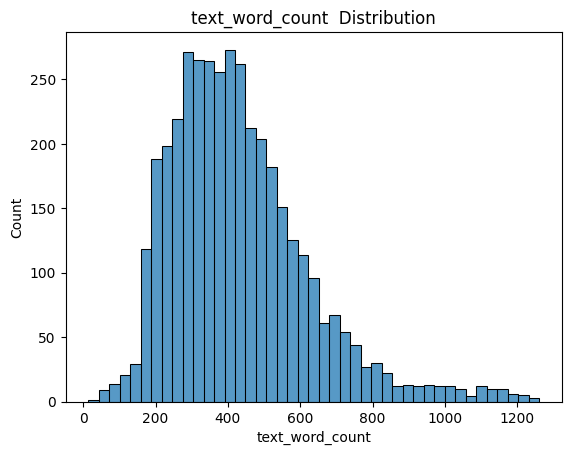

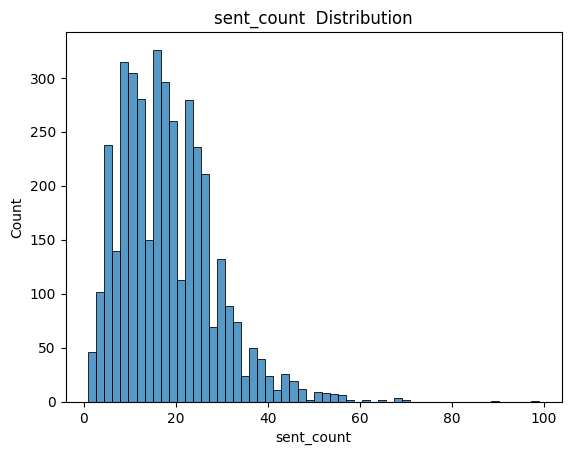

In [208]:
cols = ['text_word_count', 'sent_count']
for i, col in enumerate(cols):
    fig = sns.histplot(data=train_df, x=col)
    plt.title(col + '  Distribution')
    plt.show()

Text(0.5, 1.0, 'Relationship between number of words and scoring')

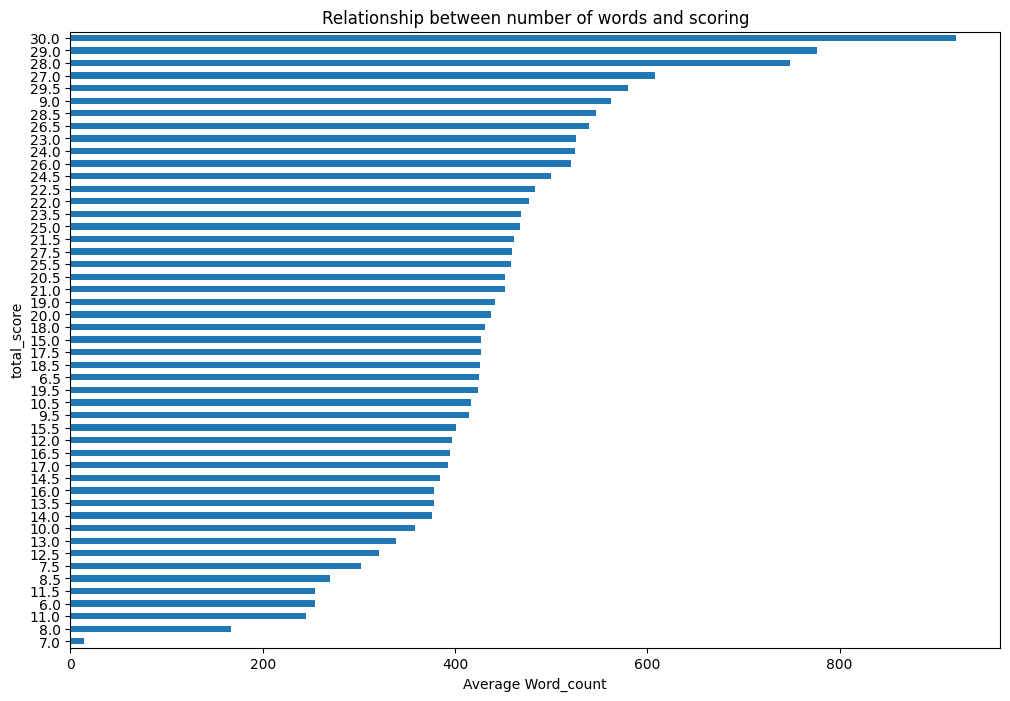

In [209]:
score_word_count = train_df.groupby('total_score')['text_word_count'].mean().sort_values()

score_word_count.plot(kind='barh', figsize=(12, 8))
plt.xlabel('Average Word_count')
plt.title('Relationship between number of words and scoring')

Text(0.5, 1.0, 'Relationship between number of sentences and scoring')

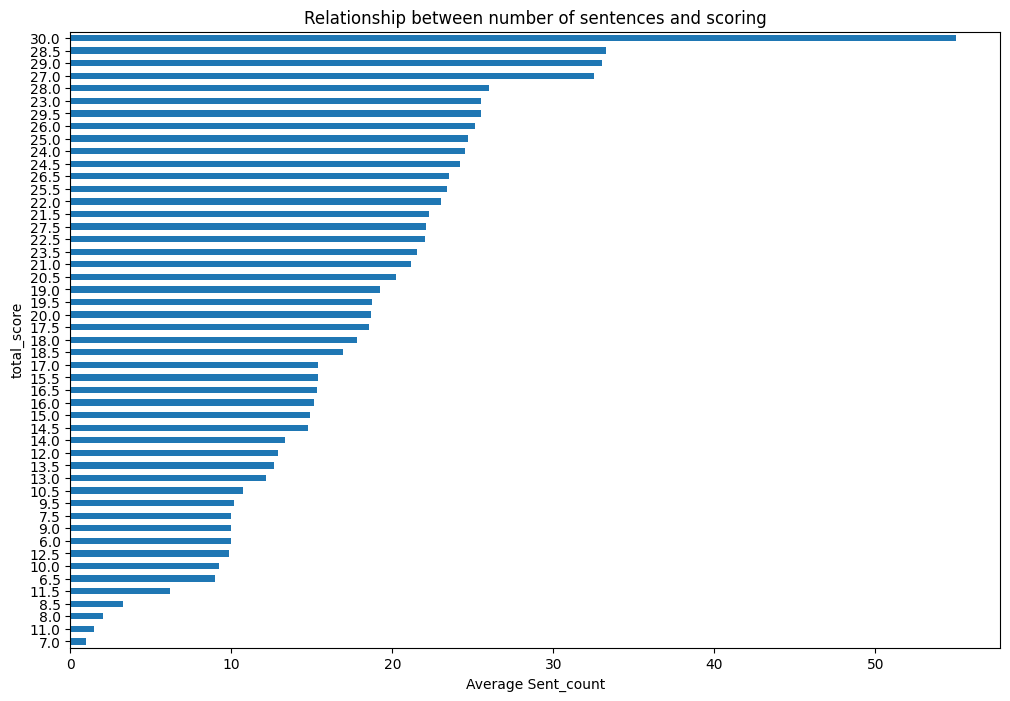

In [210]:
score_sent_count = train_df.groupby('total_score')['sent_count'].mean().sort_values()

score_sent_count.plot(kind='barh', figsize=(12, 8))
plt.xlabel('Average Sent_count')
plt.title('Relationship between number of sentences and scoring')

<AxesSubplot:>

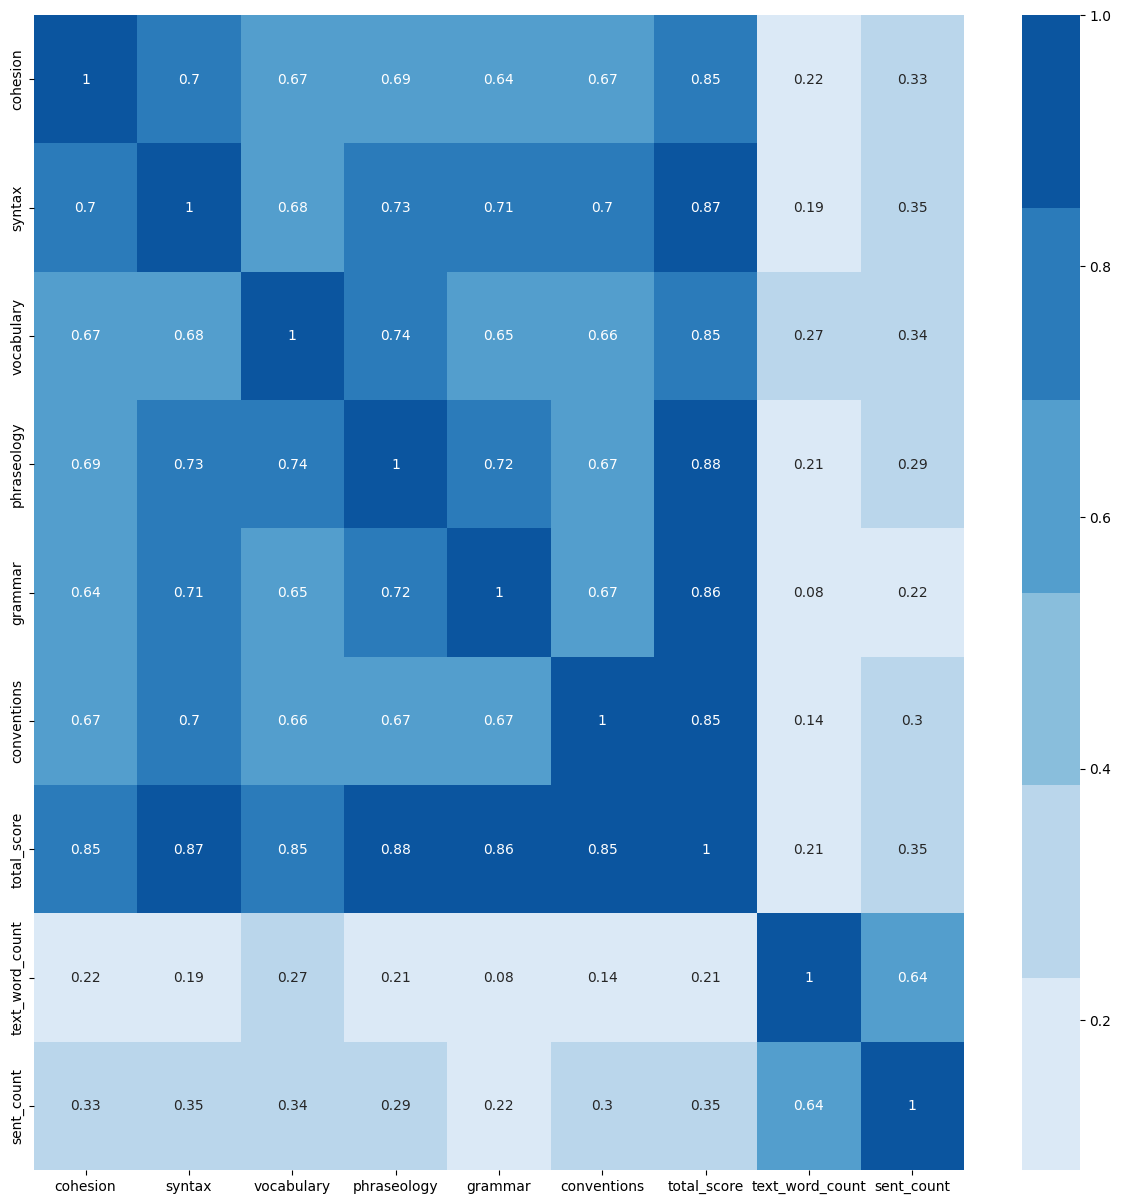

In [211]:
# 相关性分析
plt.figure(figsize=(15, 15))
colormap = sns.color_palette("Blues")
sns.heatmap(train_df.corr(), annot=True, cmap=colormap)